# 1. Spend over £25,000 in South Central Ambulance Service NHS Foundation Trust

This dataset spans from July to October and reflects real-world financial transactions, providing insights into public sector spending habits. Identifying spending trends, inefficiencies, or outliers in government spending can have significant implications for policy and budget optimization. Insights derived from this dataset could be valuable in identifying spending inefficiencies or high-cost areas, which can inform decisions to improve public sector financial accountability.

The data can be downloaded using this link:https://www.data.gov.uk/dataset/ad411e0d-6ef9-439e-baa5-a47f8fb6564c/spend-over-25-000-in-south-central-ambulance-service-nhs-foundation-trust

# 2. Data Preparation and Exploration 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2a. Data import and cleaning

In [2]:
# Load the dataset
data1 = pd.read_csv('Gateway-Spend-010724-July-2024.csv', encoding='latin1')
data2 = pd.read_csv('Gateway-Spend-010824-August-2024.csv', encoding='latin1')
data3 = pd.read_csv('Gateway-Spend-010924-September-2024-1.csv', encoding='latin1')
data4 = pd.read_csv('Gateway-Spend-011024-October-2024.csv', encoding='latin1')
# Concatenate the datasets
data = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [3]:
data

,DEPARTMENT FAMILY,ENTITY,DATE,EXPENSE TYPE,EXPENSE AREA,SUPPLIER,TRANSACTION NUMBER,AMOUNT,DESCRIPTION
0,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,04/07/2024,FLEET SERVICES,OPERATIONS,SOUTH CENTRAL FLEET SERVICES LTD,2302624,22619.20,24-25 SLA FLEET SERVICES Q1
1,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,04/07/2024,FLEET SERVICES,OPERATIONS,SOUTH CENTRAL FLEET SERVICES LTD,2302624,1495.50,24-25 SLA FLEET SERVICES Q1
2,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,04/07/2024,FLEET SERVICES,OPERATIONS,SOUTH CENTRAL FLEET SERVICES LTD,2302624,6076.80,24-25 SLA FLEET SERVICES Q1
3,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,04/07/2024,FLEET SERVICES,OPERATIONS,SOUTH CENTRAL FLEET SERVICES LTD,2302624,2642.40,24-25 SLA FLEET SERVICES Q1
4,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,04/07/2024,VEHICLE LEASING,OPERATIONS,SOUTH CENTRAL FLEET SERVICES LTD,2302630,380095.00,VEHICLE LEASE COSTS
...,...,...,...,...,...,...,...,...,...
815,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,16-10-2024,INSURANCE PREMIUM,OPERATIONS,JLT--QBE-STANDING ORDER,2287430,122073.92,MOTOR FLEET INSURANCE
816,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,31-10-2024,DIESEL,OPERATIONS,ALLSTAR FUEL CARD SERVICES- DD ONLY,2381159,90207.54,FUEL
817,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,24-10-2024,DIESEL,OPERATIONS,ALLSTAR FUEL CARD SERVICES- DD ONLY,2376007,89451.20,FUEL
818,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,17-10-2024,DIESEL,OPERATIONS,ALLSTAR FUEL CARD SERVICES- DD ONLY,2373527,92515.88,FUEL


In [4]:
# Display the first few rows of the dataset
data.head()

,DEPARTMENT FAMILY,ENTITY,DATE,EXPENSE TYPE,EXPENSE AREA,SUPPLIER,TRANSACTION NUMBER,AMOUNT,DESCRIPTION
0,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,04/07/2024,FLEET SERVICES,OPERATIONS,SOUTH CENTRAL FLEET SERVICES LTD,2302624,22619.2,24-25 SLA FLEET SERVICES Q1
1,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,04/07/2024,FLEET SERVICES,OPERATIONS,SOUTH CENTRAL FLEET SERVICES LTD,2302624,1495.5,24-25 SLA FLEET SERVICES Q1
2,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,04/07/2024,FLEET SERVICES,OPERATIONS,SOUTH CENTRAL FLEET SERVICES LTD,2302624,6076.8,24-25 SLA FLEET SERVICES Q1
3,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,04/07/2024,FLEET SERVICES,OPERATIONS,SOUTH CENTRAL FLEET SERVICES LTD,2302624,2642.4,24-25 SLA FLEET SERVICES Q1
4,DEPARTMENT OF HEALTH,SOUTH CENTRAL AMBULANCE NHS FOUNDATION TRUST,04/07/2024,VEHICLE LEASING,OPERATIONS,SOUTH CENTRAL FLEET SERVICES LTD,2302630,380095.0,VEHICLE LEASE COSTS


In [5]:
# Basic dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DEPARTMENT FAMILY   820 non-null    object 
 1   ENTITY              820 non-null    object 
 2   DATE                820 non-null    object 
 3   EXPENSE TYPE        820 non-null    object 
 4   EXPENSE AREA        820 non-null    object 
 5   SUPPLIER            820 non-null    object 
 6   TRANSACTION NUMBER  820 non-null    int64  
 7   AMOUNT              820 non-null    float64
 8   DESCRIPTION         820 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 57.8+ KB


In [6]:
#Statistical summary
data.describe()

,TRANSACTION NUMBER,AMOUNT
count,8.200000e+02,820.000000
mean,2.342916e+06,49385.022659
std,2.234007e+04,100849.435950
min,2.051175e+06,24.040000
25%,2.323788e+06,2340.080000
50%,2.343894e+06,23465.435000
75%,2.357940e+06,53356.810000
max,2.381159e+06,984810.820000


In [7]:
# Handling Missing Values
data.isnull().sum()

DEPARTMENT FAMILY     0
ENTITY                0
DATE                  0
EXPENSE TYPE          0
EXPENSE AREA          0
SUPPLIER              0
TRANSACTION NUMBER    0
AMOUNT                0
DESCRIPTION           0
dtype: int64

Used df.isnull().sum() to calculate the number of missing valuesin each column. Confirmed that all columns have no missing values, indicating the dataset is complete. So we don't have to handle the missing values using fillna or dropna.

**Handling Inconsistences**

In [8]:
# Convert categorical columns to title case
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].str.strip().str.title()

In [9]:
#Standardize Numerical Columns
data=data.copy()
data['AMOUNT'] = data['AMOUNT'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [10]:
# Negative amount check
data['AMOUNT'] < 0 

0      False
1      False
2      False
3      False
4      False
       ...  
815    False
816    False
817    False
818    False
819    False
Name: AMOUNT, Length: 820, dtype: bool

In [11]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
duplicate_count

46

In [12]:
# Remove duplicates
data = data.drop_duplicates()

In [13]:
# After dropping duplicates
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DEPARTMENT FAMILY   774 non-null    object 
 1   ENTITY              774 non-null    object 
 2   DATE                774 non-null    object 
 3   EXPENSE TYPE        774 non-null    object 
 4   EXPENSE AREA        774 non-null    object 
 5   SUPPLIER            774 non-null    object 
 6   TRANSACTION NUMBER  774 non-null    int64  
 7   AMOUNT              774 non-null    float64
 8   DESCRIPTION         774 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 60.5+ KB


46 duplicate rows are removed.

First we check for spelling variations, case sensitivity, or inconsistent naming conventions.The combination of .str.strip() and .str.title() ensures that categorical text data is clean, consistent, and ready for analysis by removing unwanted spaces and ensuring uniform capitalization. Secondly we check if there are any errors in data of Numerical columns and replace it and also check for negative values to eliminate them. Lastly we check for duplicate values and remove them from dataset

Handling inconsistencies before outliers ensures that you’re working with clean, accurate data, which leads to more reliable and meaningful outlier detection.

**Handling Outliers**

Focus on columns where outliers are relevant. For this dataset, it's AMOUNT column as AMOUNT represents the numerical values that reflect transaction costs, which are where outliers are typically found.Other columns like DEPARTMENT FAMILY or SUPPLIER are categorical and not suited for outlier detection. Outliers in this dataset typically manifest as extreme transaction amounts, which is the column most relevant for this type of analysis.

In [14]:
# Handle Outliers
Q1 = data['AMOUNT'].quantile(0.25)
Q3 = data['AMOUNT'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['AMOUNT'] < lower_bound) | (data['AMOUNT'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 57


In [15]:
# Remove outliers
data = data[(data['AMOUNT'] >= lower_bound) & (data['AMOUNT'] <= upper_bound)]

There are two methods to detect outliers - Z-Score Method (Standardization) IQR (Interquartile Range) Method.
Here transaction amount often have varying scales so we prefere IQR Method as it is generally more robust because it is less sensitive to extreme values than the Z-score method.

In [16]:
#Summary Statistics After Outlier Handling
data['AMOUNT'].describe()

count       717.000000
mean      30504.831423
std       31160.131959
min          24.040000
25%        2642.400000
50%       22281.600000
75%       47602.580000
max      129529.910000
Name: AMOUNT, dtype: float64

Transaction numbers are unique, so their values remain unchanged. Outliers in the Amount column have been removed, resulting in a reduced mean and standard deviation, with the maximum value capped at 129529.910000.

In [17]:
data.shape

(717, 9)

57 Outliers are also removed.

In [18]:
data=data.drop(columns=['DEPARTMENT FAMILY','ENTITY'])

The columns Department, Family, and Entity are being dropped from the dataset as their values remain constant throughout, providing no additional variability or insight for analysis.

# 2b. Exploratory Data Analysis (EDA)

In [19]:
# Total spend amount
data['AMOUNT'].sum()

21871964.130000003

In [20]:
# Average spend amount 
data['AMOUNT'].mean()

30504.831422594132

In [21]:
# std dev of spend amount
data['AMOUNT'].std()

31160.13195908725

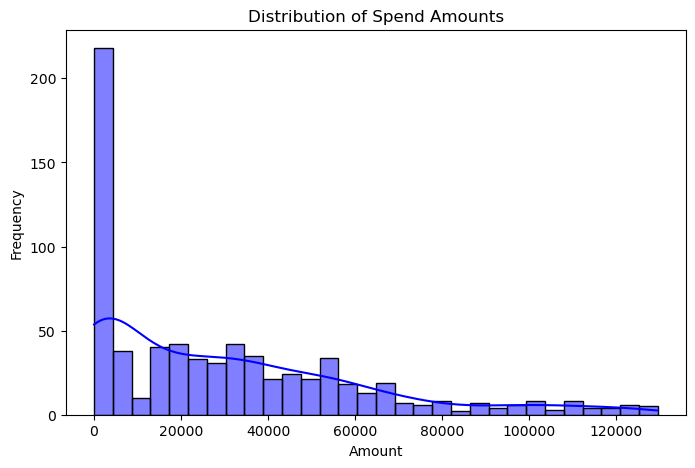

In [22]:
# Amount Frequency Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['AMOUNT'], bins=30, kde=True, color='blue')
plt.title('Distribution of Spend Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Because of the right-skewed distribution of the histogram, the majority of transactions involve smaller sums, but a tiny number involve much greater sums.Spending amounts close to the lower end (between 0 and 20,000) are quite frequent, indicating that smaller transactions are more typical. The lower end of the frequency spectrum (between 0 and 10,000) has a peak.

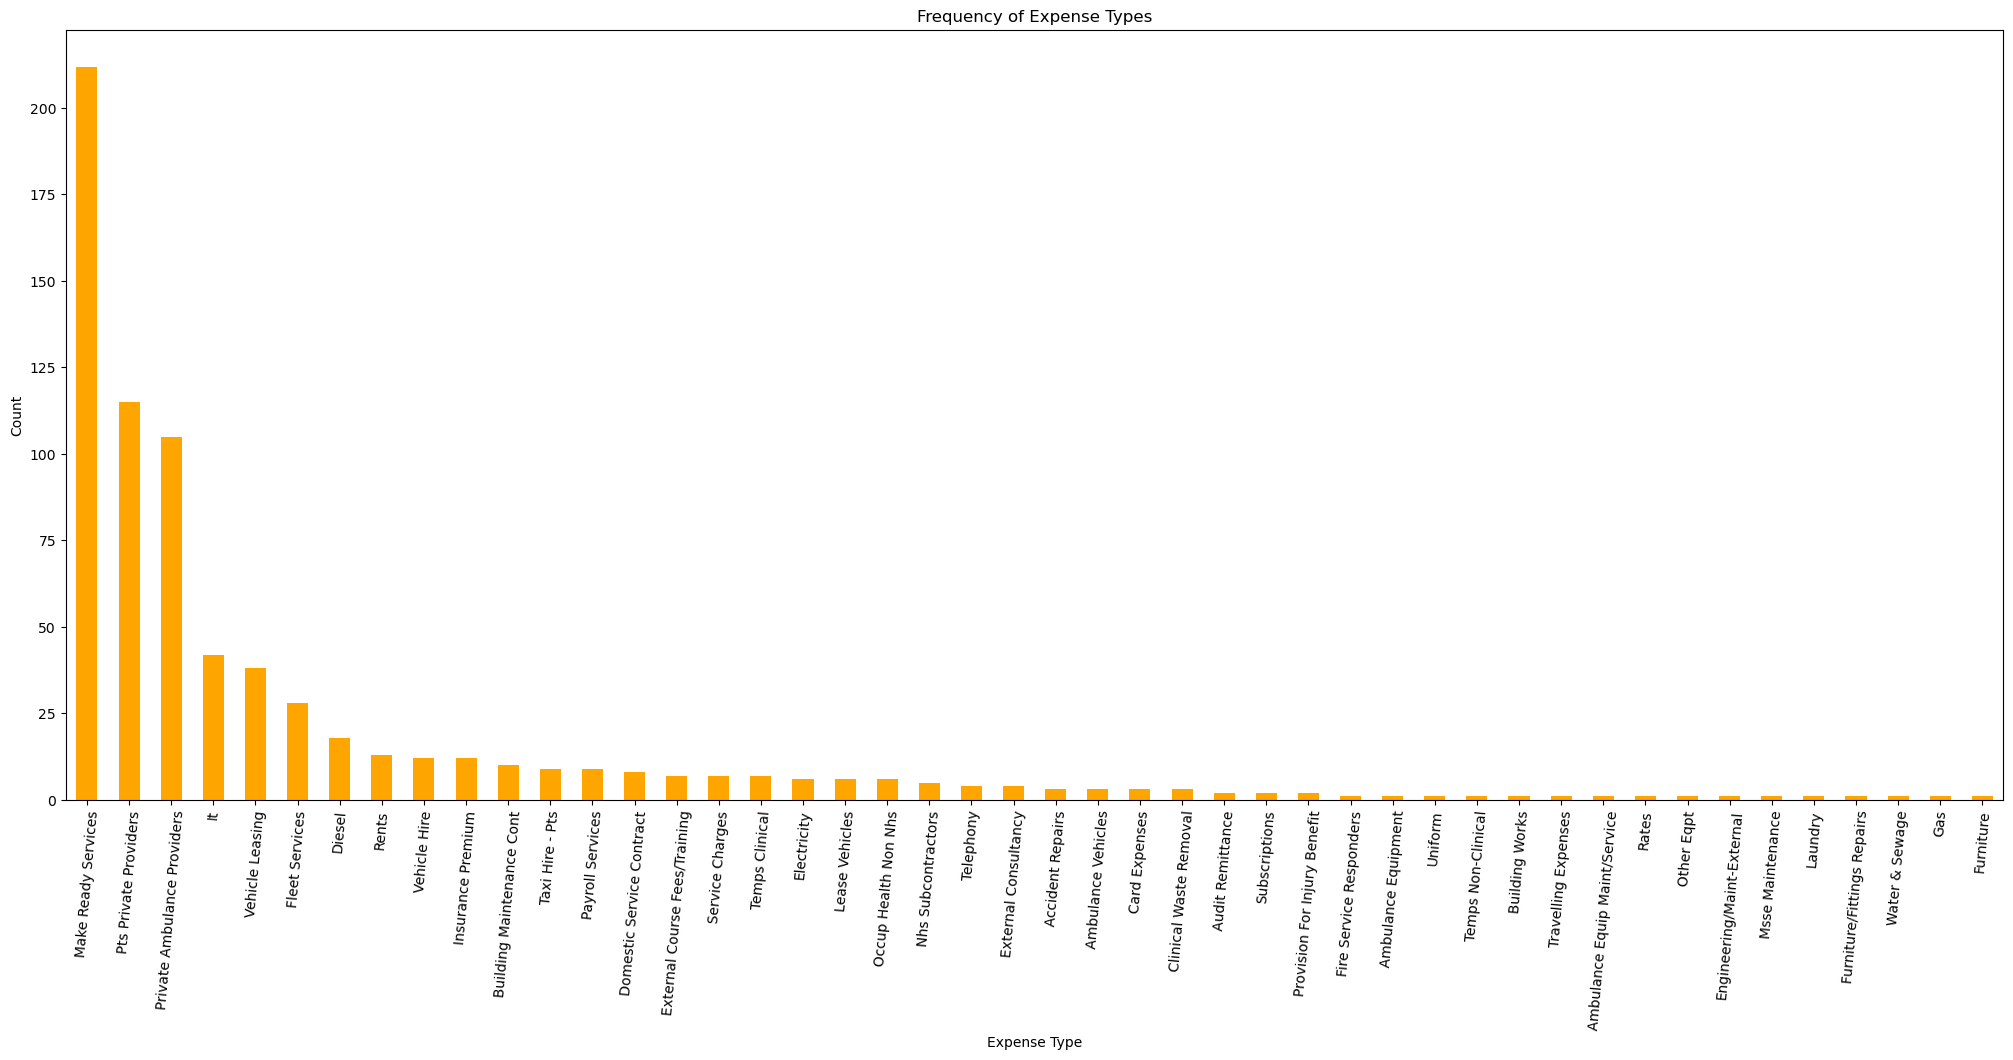

In [23]:
# Bar plot for expense types
plt.figure(figsize=(25, 10))
data['EXPENSE TYPE'].value_counts().plot(kind='bar', color='orange')
plt.title('Frequency of Expense Types')
plt.xlabel('Expense Type')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.show()

The expense types are not evenly distributed, with certain categories being significantly more frequent than others.The "Make Ready Services" category is the most common, with the highest frequency (above 200 occurrences). Pts Private Providers and Private Ambulance Providers have frequency above 100.

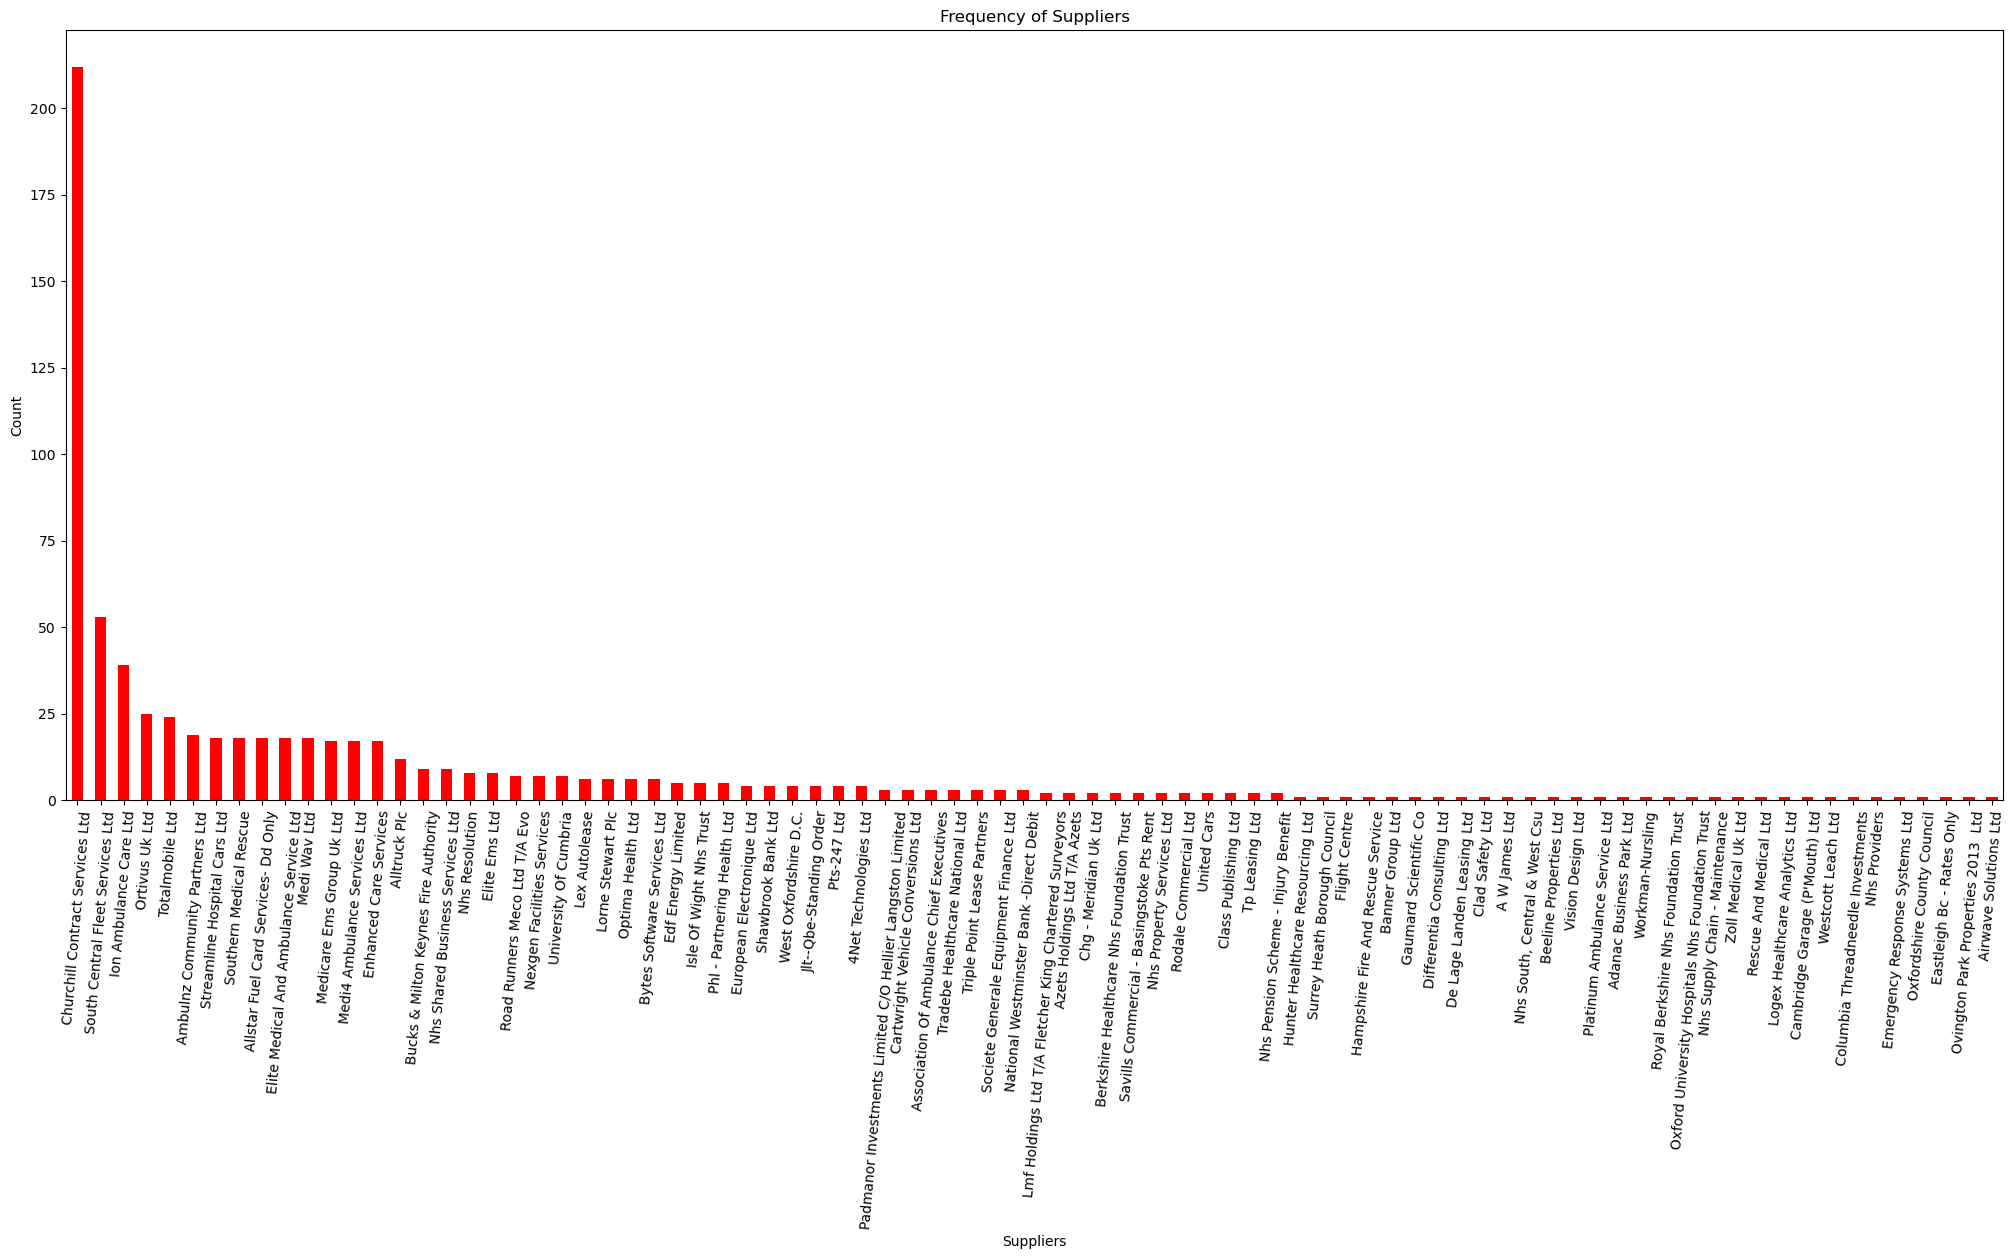

In [24]:
# Bar plot for suppliers 
plt.figure(figsize=(25, 10))
data['SUPPLIER'].value_counts().plot(kind='bar', color='red')
plt.title('Frequency of Suppliers')
plt.xlabel('Suppliers')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.show()

This bar chart visualizes the frequency of occurrences for different "Suppliers" in the dataset. The supplier Churchill Contract Services Ltd has the highest frequency, with over 200 transactions. Next is South Central Fleet Services Ltd. with nearly 50 transactions.

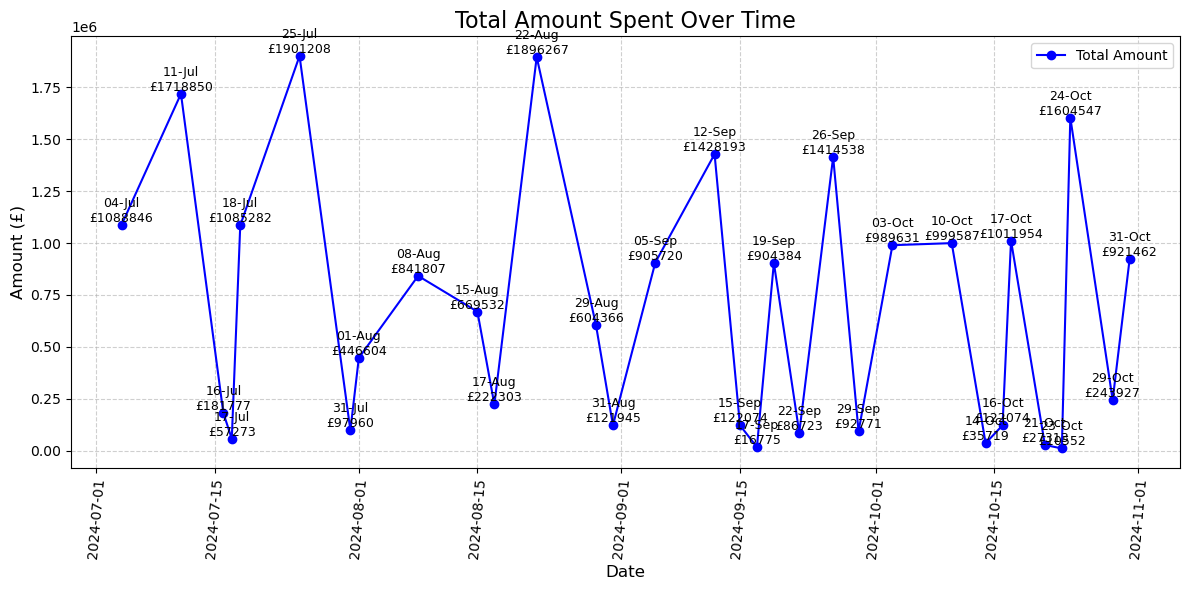

In [25]:
# Convert the 'DATE' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce', dayfirst=True)

# Aggregate data by date to get total amounts per day
date_amounts = data.groupby('DATE')['AMOUNT'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(date_amounts['DATE'], date_amounts['AMOUNT'], marker='o', linestyle='-', color='b', label='Total Amount')
plt.title('Total Amount Spent Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount (£)', fontsize=12)

# Annotate peaks with date and amount
for _, row in date_amounts.iterrows():
    plt.text(row['DATE'], row['AMOUNT'], f"{row['DATE'].strftime('%d-%b')}\n£{row['AMOUNT']:.0f}", 
             fontsize=9, ha='center', va='bottom')

plt.xticks(rotation=85)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


The sharp fluctuations (spikes and drops) in the line plot from July-October indicate that there were irregular peaks and troughs in spending during these months. The graph indicates that the highest spending typically occurs on Thursdays.

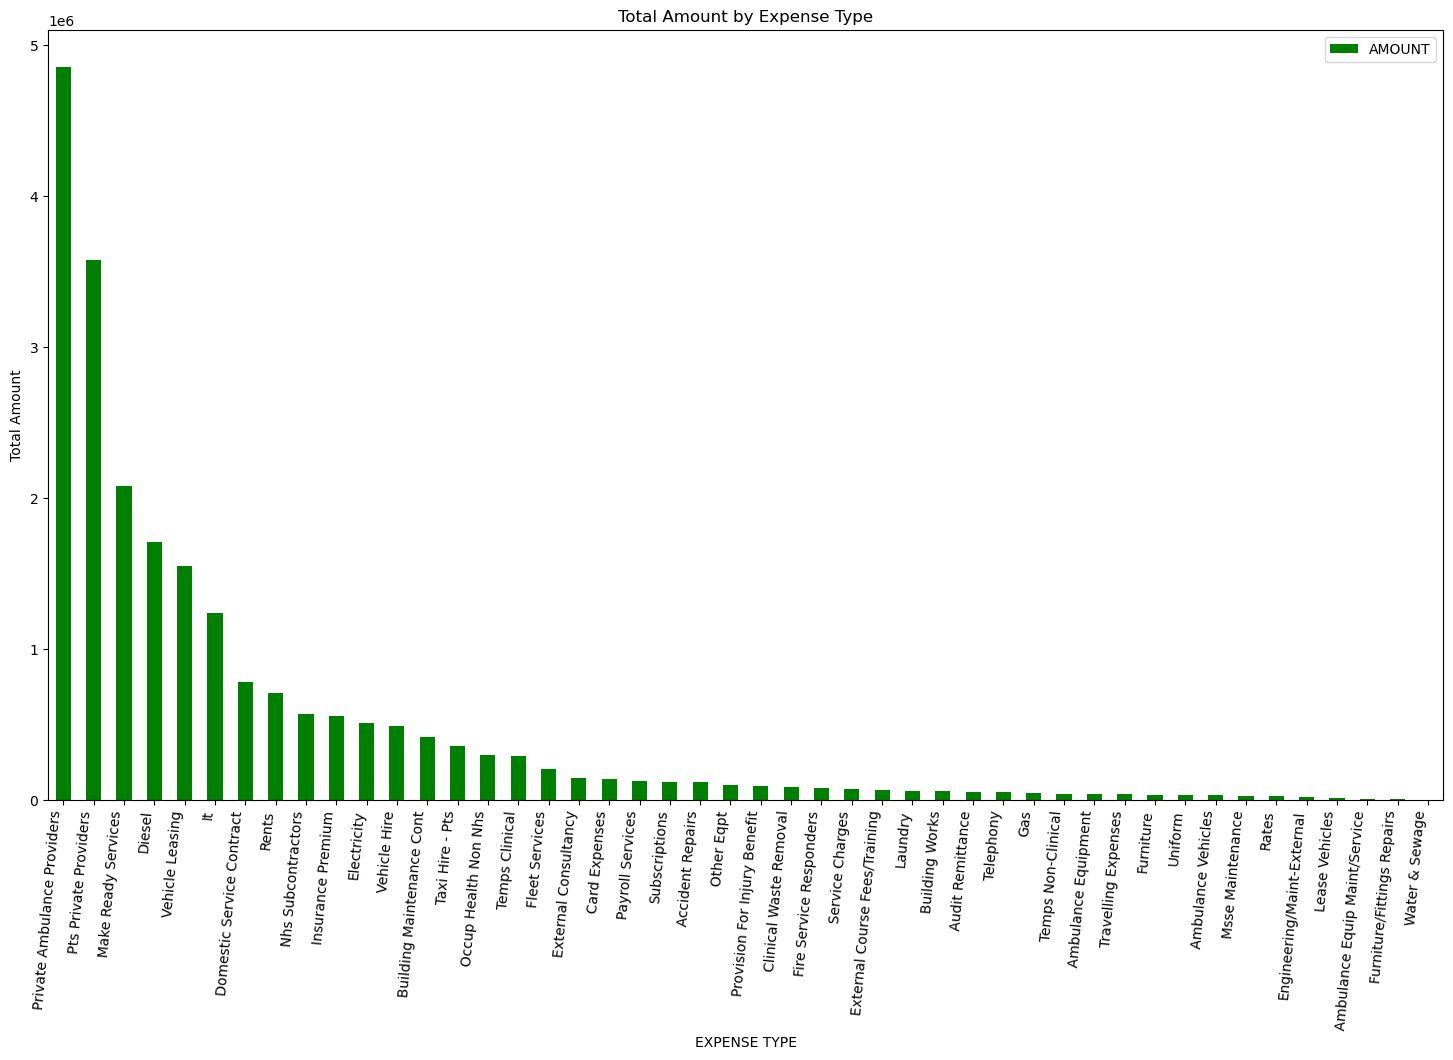

In [26]:
# Amount vs Expense Type Plot
expense_type_amount = data.groupby('EXPENSE TYPE')['AMOUNT'].sum().reset_index()
expense_type_amount = expense_type_amount.sort_values(by='AMOUNT', ascending=False)
expense_type_amount.plot(kind='bar', x='EXPENSE TYPE', y='AMOUNT',figsize=(18, 10), color='green')
plt.title('Expense_type_amount')
plt.xlabel('EXPENSE TYPE')
plt.ylabel('Total Amount')
plt.title('Total Amount by Expense Type')
plt.xticks(rotation=85, ha= 'right')
plt.show()

This bar chart displays the total amount spent across various expense types. A clear peak is visible, suggesting a heavy reliance on private ambulance providers.

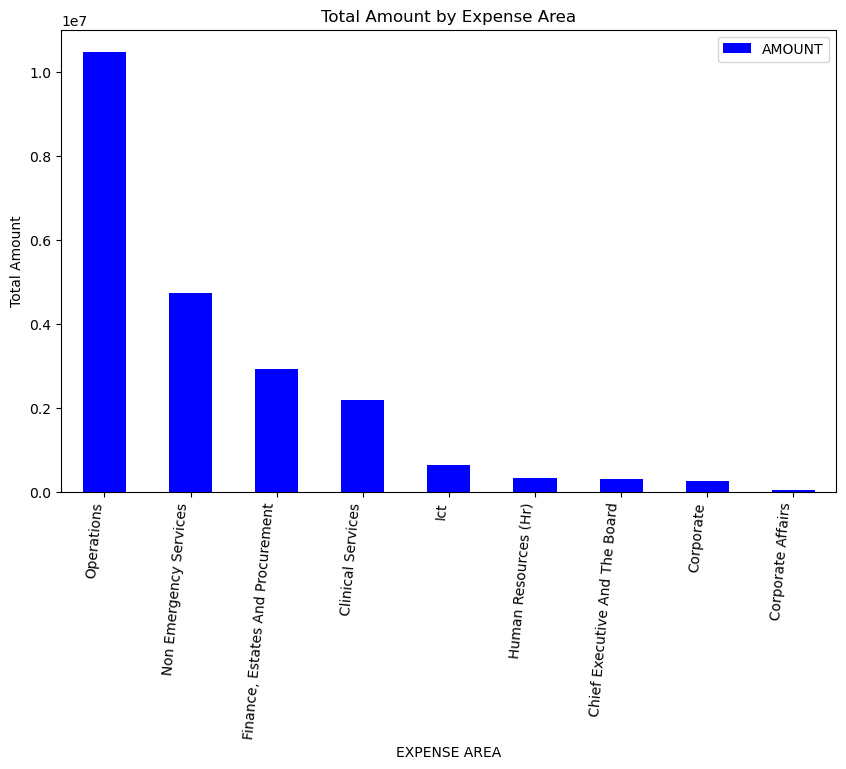

In [27]:
# Amount vs Expense Area Plot
expense_area_amount = data.groupby('EXPENSE AREA')['AMOUNT'].sum().reset_index()
expense_area_amount = expense_area_amount.sort_values(by='AMOUNT', ascending=False)
expense_area_amount.plot(kind='bar', x='EXPENSE AREA', y='AMOUNT',figsize=(10, 6), color='blue')
plt.title('Expense_area_amount')
plt.xlabel('EXPENSE AREA')
plt.ylabel('Total Amount')
plt.title('Total Amount by Expense Area')
plt.xticks(rotation=85, ha='right')
plt.show()

This bar chart displays the total amount spent across various expense areas. Spending is concentrated in specific categories, with "OPERATIONS" having the highest spending by a significant margin. Other notable categories include "NON EMERGENCY SERVICES," while most categories have relatively low spending.

In [28]:
# Check unique values in 'EXPENSE TYPE' and 'DESCRIPTION' to understand the range of categories
print(data['EXPENSE TYPE'].unique())
print(data['DESCRIPTION'].unique())

['Fleet Services' 'Vehicle Leasing' 'Accident Repairs'
 'External Consultancy' 'Private Ambulance Providers' 'It'
 'Msse Maintenance' 'Clinical Waste Removal' 'Laundry' 'Temps Clinical'
 'Pts Private Providers' 'Nhs Subcontractors' 'Building Maintenance Cont'
 'Occup Health Non Nhs' 'Telephony' 'Vehicle Hire' 'Make Ready Services'
 'Engineering/Maint-External' 'Gas' 'Electricity' 'Water & Sewage'
 'Furniture/Fittings Repairs' 'Domestic Service Contract'
 'Service Charges' 'Payroll Services' 'Provision For Injury Benefit'
 'Taxi Hire - Pts' 'Insurance Premium' 'External Course Fees/Training'
 'Diesel' 'Card Expenses' 'Ambulance Equip Maint/Service' 'Other Eqpt'
 'Lease Vehicles' 'Rents' 'Subscriptions' 'Rates'
 'Fire Service Responders' 'Uniform' 'Ambulance Equipment'
 'Audit Remittance' 'Travelling Expenses' 'Temps Non-Clinical'
 'Ambulance Vehicles' 'Building Works' 'Furniture']
['24-25 Sla Fleet Services Q1' 'Vehicle Lease Costs' 'Vehicle Maintenance'
 'Collaborative Charges' 'Pp Hou

In [29]:
# Group the data by 'EXPENSE TYPE' and aggregate the 'DESCRIPTION' to see which descriptions are related to each type
expense_description_mapping = data.groupby('EXPENSE TYPE')['DESCRIPTION'].apply(lambda x: ', '.join(x.unique())).reset_index()
# Add a new column for the count of unique descriptions
expense_description_mapping['DESCRIPTION_COUNT'] = data.groupby('EXPENSE TYPE')['DESCRIPTION'].nunique().reset_index()['DESCRIPTION']
# Sort the data by the number of unique descriptions in descending order
expense_description_mapping_sorted = expense_description_mapping.sort_values(by='DESCRIPTION_COUNT', ascending=False)
expense_description_mapping_sorted

,EXPENSE TYPE,DESCRIPTION,DESCRIPTION_COUNT
34,Rents,"Rent - Nursling, Rent - Werc, Basingstoke Pts ...",12
21,It,"Computer Software Licence Fee, Data Hosting & ...",8
35,Service Charges,"Shared Building Costs, Basingstoke Pts Rent Ch...",5
16,Fleet Services,"24-25 Sla Fleet Services Q1, 24-25 Sla Fleet S...",5
13,External Consultancy,"Collaborative Charges, Improvement Services, M...",4
29,Payroll Services,"Payroll Charges For 24/25, Payroll Charges, Pa...",3
5,Building Maintenance Cont,"Building Maintenance Contract, Shared Building...",3
20,Insurance Premium,"2024/25 Nhsla Ltps, Cnst & Pes, Motor Fleet In...",3
14,External Course Fees/Training,"Hee Wfd Funding, Bridging Courses",2
30,Private Ambulance Providers,"Pp Hours, Contract Software",2


This approach helps identify which 'EXPENSE TYPE' has more unique descriptions, providing insight into the variety of different expense types. Clearly, rent has more unique descriptions than others.

                    TRANSACTION NUMBER    AMOUNT
TRANSACTION NUMBER            1.000000 -0.035403
AMOUNT                       -0.035403  1.000000


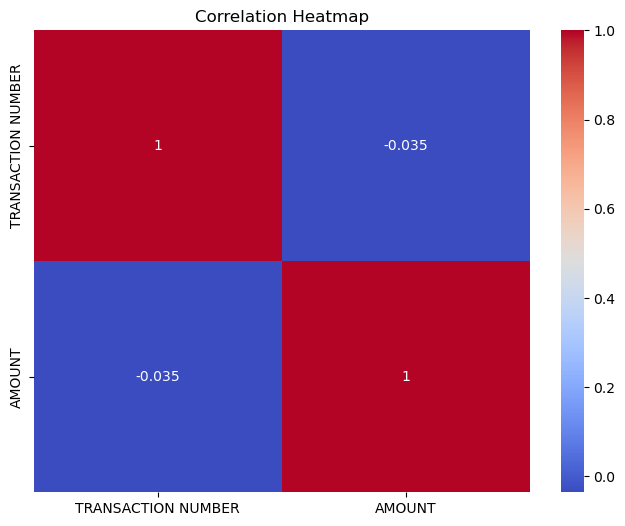

In [30]:
# Correlation matrix for numerical columns
correlation_matrix = data.corr()
print(correlation_matrix)
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The absence of correlation between 'Transaction' and 'Amount' indicates that these variables are likely independent. This implies that the frequency of transactions does not necessarily determine the monetary amount. This correlation in analysis does not add significant value.

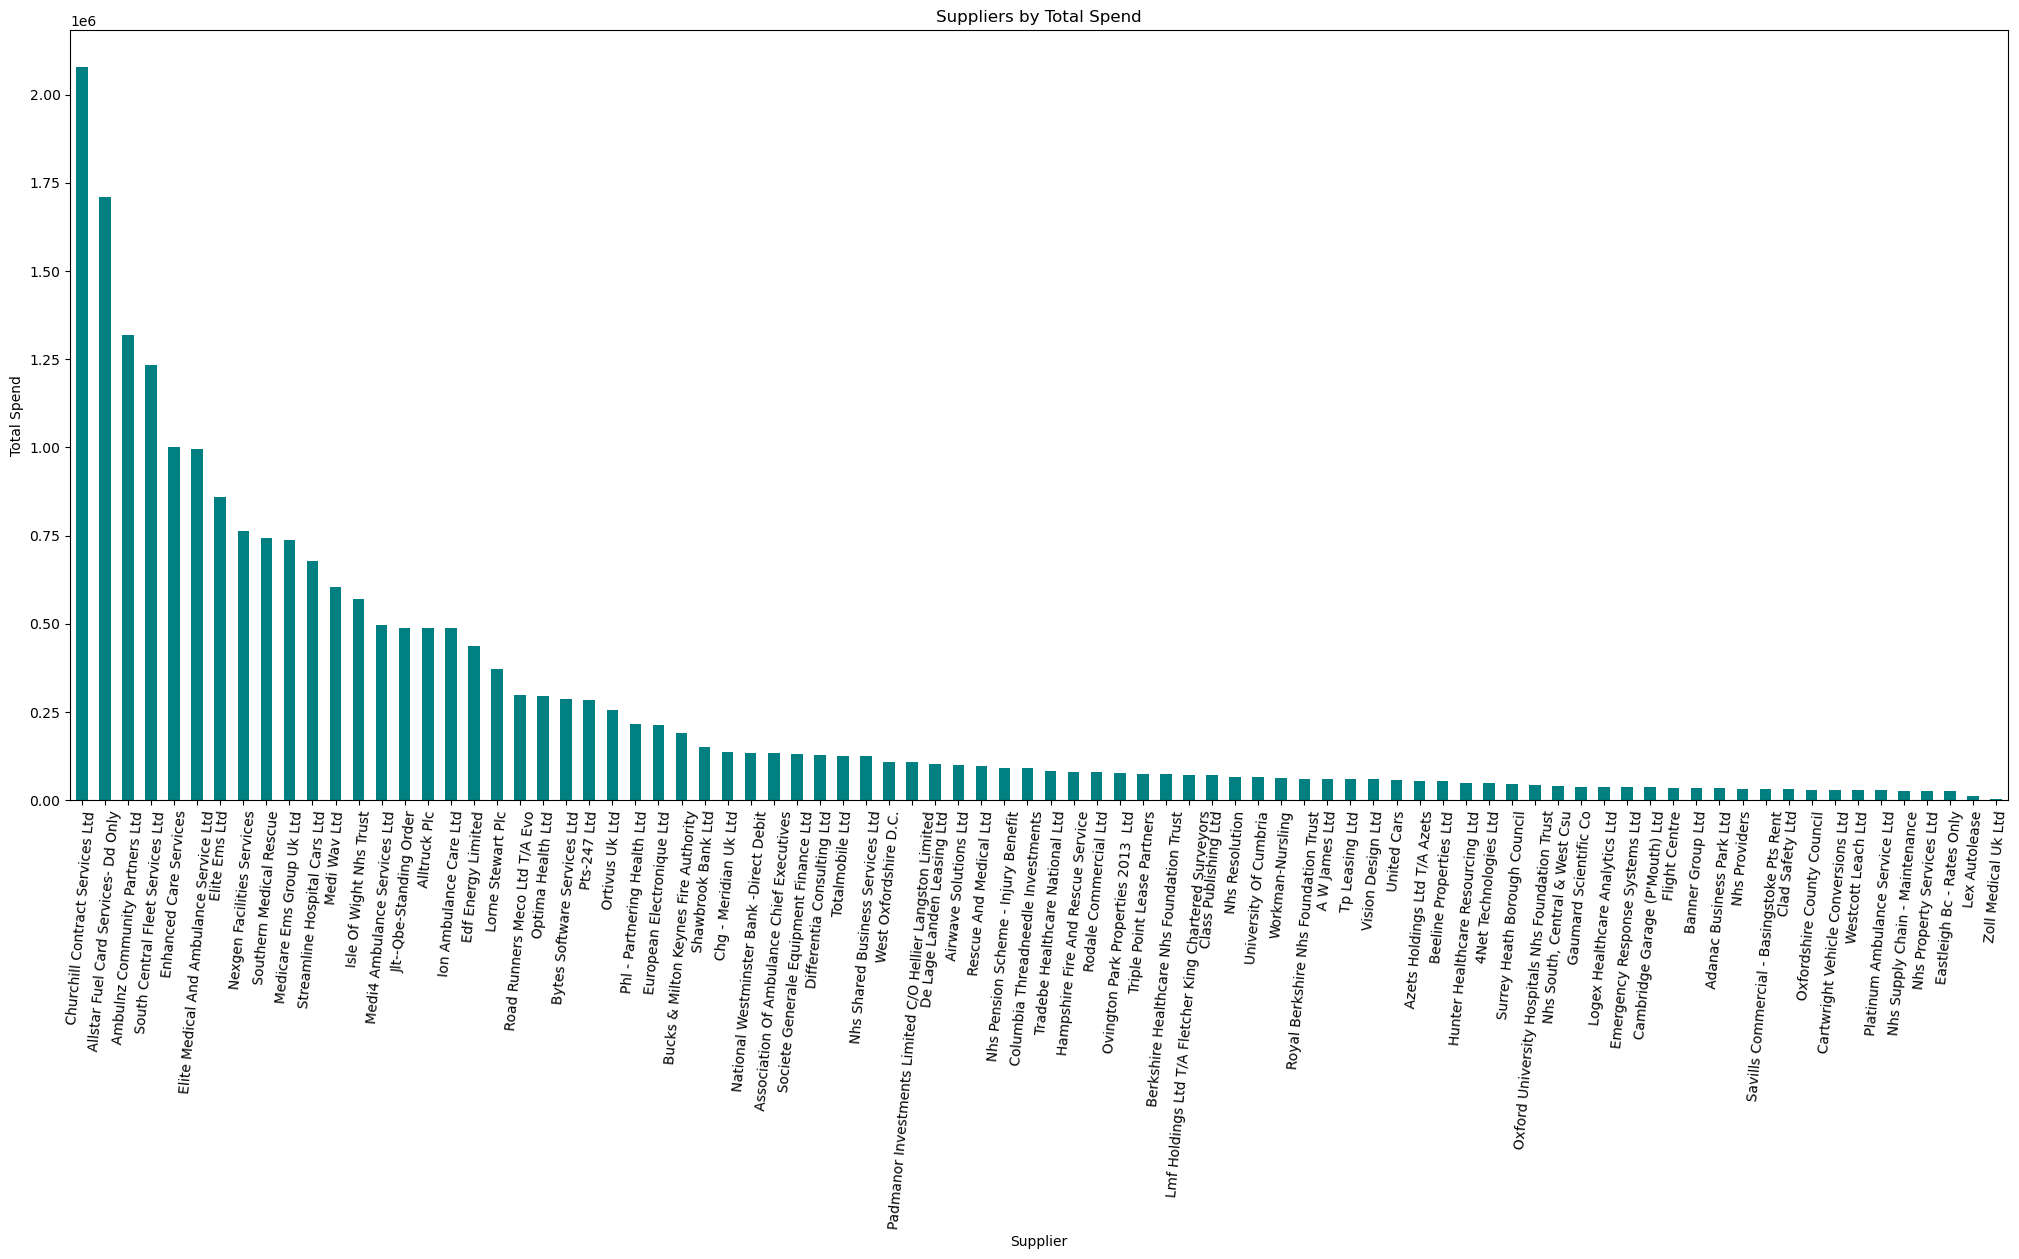

In [31]:
# Group by 'SUPPLIER' and sum 'AMOUNT'
top_suppliers = data.groupby('SUPPLIER')['AMOUNT'].sum()
top_suppliers = top_suppliers.sort_values(ascending=False)
# Bar plot
top_suppliers.plot(kind='bar', figsize=(25, 10), color='teal')
plt.title('Suppliers by Total Spend')
plt.xlabel('Supplier')
plt.ylabel('Total Spend')
plt.xticks(rotation=85)  
plt.show()

This bar chart shows the total spending for different suppliers. Spending is highly uneven, with churchill contract services ltd. supplier showing a significantly higher spending compared to others.

# 3. Data Analysis

# 3a. Data Manipulation with Pandas and NumPy

In [32]:
# Grouping the data by 'EXPENSE TYPE' and calculating the sum of 'AMOUNT' for each group
expense_summary = data.groupby('EXPENSE TYPE')['AMOUNT'].sum().reset_index()

In [33]:
# Sorting the data in descending order to identify the top expense types
expense_summary = expense_summary.sort_values(by='AMOUNT', ascending=False)

In [34]:
top_expenses = expense_summary.head(10)
print(top_expenses)

                   EXPENSE TYPE      AMOUNT
30  Private Ambulance Providers  4854835.10
32        Pts Private Providers  3571752.50
24          Make Ready Services  2078473.64
9                        Diesel  1709373.18
44              Vehicle Leasing  1545613.19
21                           It  1233809.37
10    Domestic Service Contract   783384.83
34                        Rents   704716.97
26           Nhs Subcontractors   570660.90
20            Insurance Premium   555395.68


Private ambulance providers spends the highest amount. The graph for the same is plotted above.

In [35]:
# Filtering the data to find transactions above a certain threshold (e.g., AMOUNT > 100000)
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce', dayfirst=True)
high_value_transactions = data[data['AMOUNT'] > 100000]
print(high_value_transactions)

          DATE                 EXPENSE TYPE                      EXPENSE AREA  \
8   2024-07-04  Private Ambulance Providers                        Operations   
22  2024-07-11  Private Ambulance Providers                        Operations   
41  2024-07-18           Nhs Subcontractors                        Operations   
46  2024-07-18                           It                               Ict   
166 2024-07-25  Private Ambulance Providers                        Operations   
167 2024-07-18  Private Ambulance Providers                        Operations   
185 2024-07-11    Domestic Service Contract  Finance, Estates And Procurement   
186 2024-07-11    Domestic Service Contract  Finance, Estates And Procurement   
187 2024-07-11    Domestic Service Contract  Finance, Estates And Procurement   
192 2024-07-25    Building Maintenance Cont  Finance, Estates And Procurement   
205 2024-07-25    Domestic Service Contract  Finance, Estates And Procurement   
207 2024-07-11              

In [36]:
# Group by 'SUPPLIER' and sum the 'AMOUNT', then sort in descending order
top_suppliers = data.groupby('SUPPLIER')['AMOUNT'].sum().sort_values(ascending=False).head(5)
top_suppliers

SUPPLIER
Churchill Contract Services Ltd        2078473.64
Allstar Fuel Card Services- Dd Only    1709373.18
Ambulnz Community Partners Ltd         1319173.99
South Central Fleet Services Ltd       1233089.53
Enhanced Care Services                 1002490.23
Name: AMOUNT, dtype: float64

In [37]:
# Convert 'DATE' to datetime
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# Extract the month and filter for July, August, and October
filtered_data = data[data['DATE'].dt.month.isin([7, 8, 9, 10])]

# Group by the month combination
filtered_data['Month'] = filtered_data['DATE'].dt.to_period('M')
monthly_trends = filtered_data.groupby('Month')['AMOUNT'].sum().reset_index()

print(monthly_trends)

     Month      AMOUNT
0  2024-07  6131195.90
1  2024-08  4802823.57
2  2024-09  4971178.14
3  2024-10  5966766.52


This provides the total amount spend in these four months individually.

In [38]:
# Group by 'EXPENSE AREA' and calculate the average 'AMOUNT'
average_spend_expense_area = data.groupby('EXPENSE AREA')['AMOUNT'].mean().sort_values(ascending=False)
average_spend_expense_area

EXPENSE AREA
Human Resources (Hr)                48063.714286
Operations                          44021.006975
Chief Executive And The Board       42660.955714
Ict                                 41845.158667
Finance, Estates And Procurement    41760.440714
Corporate                           28819.611111
Clinical Services                   20323.007009
Non Emergency Services              18236.520385
Corporate Affairs                    8387.500000
Name: AMOUNT, dtype: float64

Human Resource has the highest average amount whereas corporate affairs has the least.

# 3b. Feature Engineering

In [39]:
print(data['AMOUNT'].min(), data['AMOUNT'].max())

24.04 129529.91


In [40]:
# Define thresholds for transaction sizes
data['Transaction Size'] = pd.cut(
    data['AMOUNT'], 
    bins=[0, 1000, 10000, 100000, np.inf], 
    labels=['Small', 'Medium', 'Large', 'Very Large']
)

# Preview the updated DataFrame
data[['AMOUNT', 'Transaction Size']]

,AMOUNT,Transaction Size
0,22619.20,Large
1,1495.50,Medium
2,6076.80,Medium
3,2642.40,Medium
5,30600.00,Large
...,...,...
815,122073.92,Very Large
816,90207.54,Large
817,89451.20,Large
818,92515.88,Large


In [41]:
# Ensure 'DATE' column is in datetime format
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# Filter the data to include only July to October
data = data[(data['DATE'] >= '2024-07-01') & (data['DATE'] <= '2024-10-31')]

# Sort data by 'DATE'
data = data.sort_values(by='DATE')

# Create 'Cumulative Spend' feature
data['Cumulative Spend'] = data['AMOUNT'].cumsum()

# Preview the updated DataFrame
print(data[['DATE', 'AMOUNT', 'Cumulative Spend']])

          DATE    AMOUNT  Cumulative Spend
0   2024-07-04  22619.20          22619.20
33  2024-07-04  40178.83          62798.03
35  2024-07-04  31538.25          94336.28
38  2024-07-04  53310.47         147646.75
206 2024-07-04  95842.84         243489.59
..         ...       ...               ...
792 2024-10-31   1350.90       21635365.62
801 2024-10-31  34907.52       21670273.14
800 2024-10-31  72965.78       21743238.92
810 2024-10-31  30155.77       21773394.69
773 2024-10-31  98569.44       21871964.13

[717 rows x 3 columns]


# 3c. Statistical Analysis

In [42]:
data.describe()

,TRANSACTION NUMBER,AMOUNT,Cumulative Spend
count,7.170000e+02,717.000000,7.170000e+02
mean,2.342823e+06,30504.831423,1.123409e+07
std,2.286580e+04,31160.131959,6.158821e+06
min,2.051175e+06,24.040000,2.261920e+04
25%,2.323470e+06,2642.400000,5.972791e+06
50%,2.343387e+06,22281.600000,1.093402e+07
75%,2.357947e+06,47602.580000,1.614919e+07
max,2.381159e+06,129529.910000,2.187196e+07


In [43]:
# Skewness and kurtosis for 'AMOUNT'
skewness = data['AMOUNT'].skew()
print('skewness=', skewness)
kurtosis = data['AMOUNT'].kurt()
print('kurtosis=',kurtosis)

skewness= 1.1488482646408555
kurtosis= 0.7768312056086653


Skewness>0 - this means the distribution is rightly skewed.
     Kurtosis<3 - indicates lighter tails

In [44]:
# Calculate cumulative percentage of total spending by 'SUPPLIER'
supplier_spending = data.groupby('SUPPLIER')['AMOUNT'].sum().sort_values(ascending=False)
cumulative_spending = supplier_spending.cumsum() / supplier_spending.sum()

# Find the point where 80% of spending is reached
pareto_cutoff = cumulative_spending[cumulative_spending <= 0.8]
pareto_cutoff

SUPPLIER
Churchill Contract Services Ltd            0.095029
Allstar Fuel Card Services- Dd Only        0.173183
Ambulnz Community Partners Ltd             0.233496
South Central Fleet Services Ltd           0.289874
Enhanced Care Services                     0.335708
Elite Medical And Ambulance Service Ltd    0.381170
Elite Ems Ltd                              0.420454
Nexgen Facilities Services                 0.455405
Southern Medical Rescue                    0.489399
Medicare Ems Group Uk Ltd                  0.523157
Streamline Hospital Cars Ltd               0.554099
Medi Wav Ltd                               0.581706
Isle Of Wight Nhs Trust                    0.607797
Medi4 Ambulance Services Ltd               0.630458
Jlt--Qbe-Standing Order                    0.652783
Alltruck Plc                               0.675075
Ion Ambulance Care Ltd                     0.697356
Edf Energy Limited                         0.717371
Lorne Stewart Plc                          0.734323
Roa

These are the suppliers that account for 80% of the total amount spend.

# Data Visualization

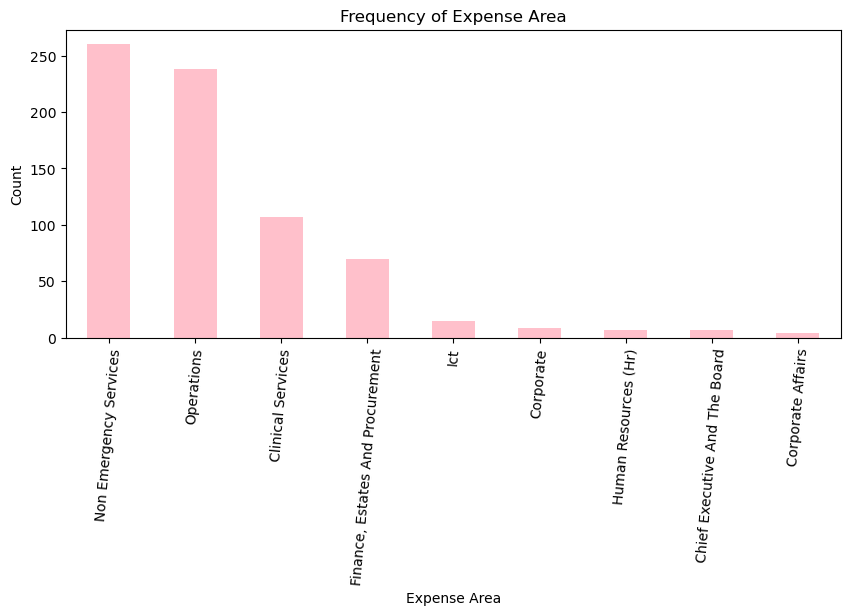

In [45]:
# Bar plot for expense area
plt.figure(figsize=(10, 4))
data['EXPENSE AREA'].value_counts().plot(kind='bar', color='pink')
plt.title('Frequency of Expense Area')
plt.xlabel('Expense Area')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.show()

This bar chart visualizes the frequency of occurrences for different "Expense Areas" in the dataset. Non Emergency Services and Operations are the most frequent expense areas, both with more than 200 occurrences each. Expense areas such as Corporate Affairs, Executive and the Board, ICT, and HR have very few occurrences, indicating that they are less frequent contributors to the dataset.

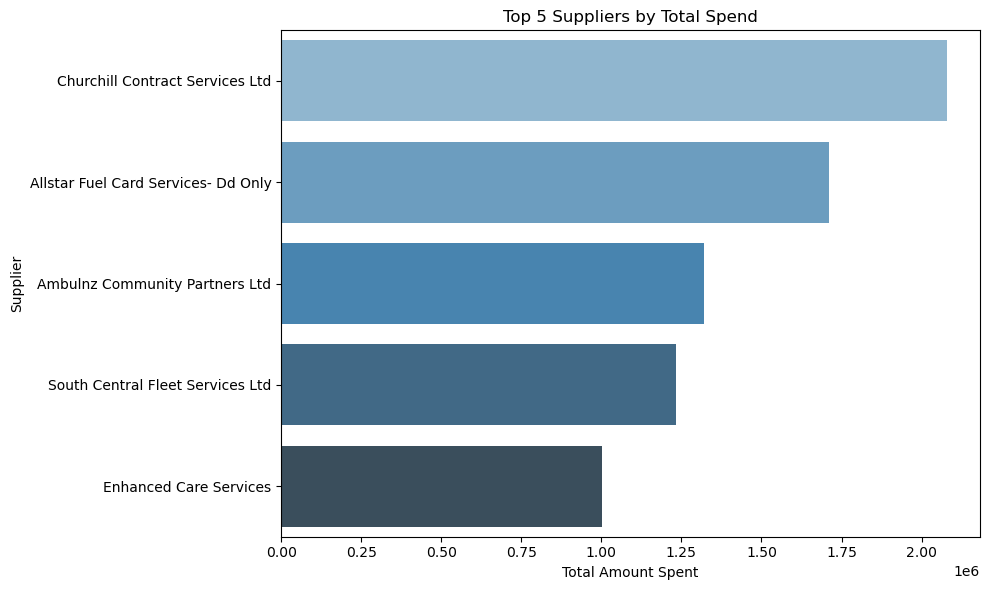

In [46]:
# Top 5 suppliers by total spend
top_suppliers = data.groupby('SUPPLIER')['AMOUNT'].sum().nlargest(5).reset_index()

# Bar plot of top suppliers
plt.figure(figsize=(10, 6))
sns.barplot(x='AMOUNT', y='SUPPLIER', data=top_suppliers, palette='Blues_d')
plt.title('Top 5 Suppliers by Total Spend')
plt.xlabel('Total Amount Spent')
plt.ylabel('Supplier')
plt.tight_layout()
plt.show()

We have plotted the graph for top 5 suppliers and clearly churchill contract services ltd. has highest spending.

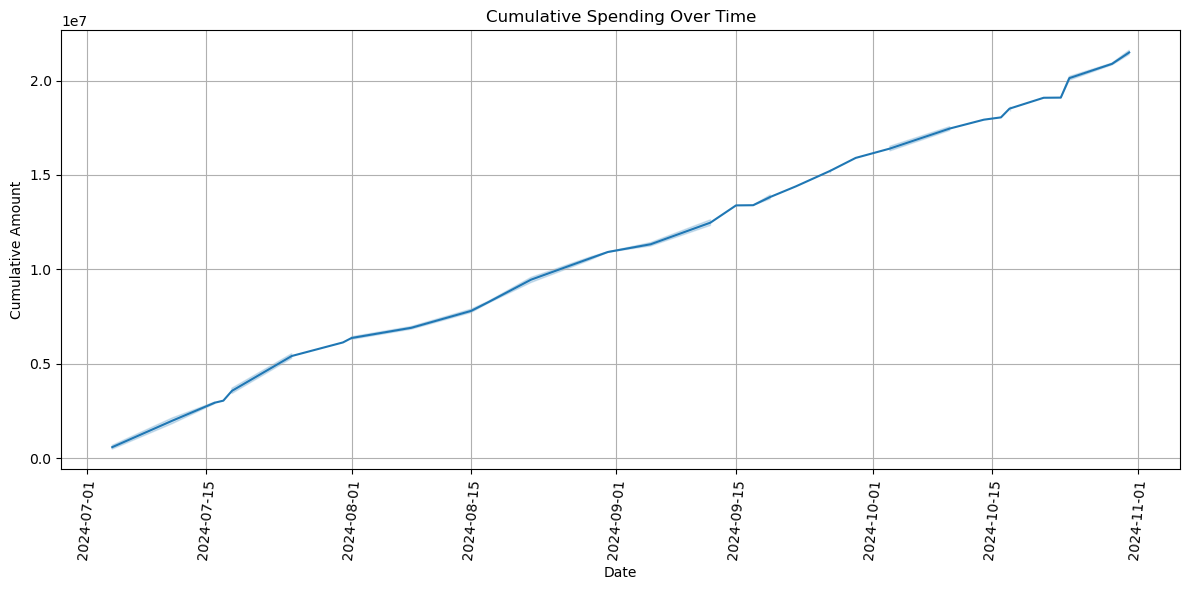

In [47]:
# Calculate cumulative spending
data['Cumulative Amount'] = data['AMOUNT'].cumsum()

# Plot cumulative spending over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='Cumulative Amount', data=data)
plt.title('Cumulative Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Amount')
plt.grid()
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

This graph provides the cumulative spend for the four consecutive months.

# Conclusions and Recommendations

Summary of Findings:
Spending Trends:
Monthly analysis revealed fluctuating spending patterns, with some days exhibiting significantly higher expenses i.e. Thursday has most spending than anyother days of the week.

Top Suppliers:
A small number of suppliers accounted for a large proportion of total expenditures, which aligns with the 80/20 Pareto principle.

Expense Distribution:
Certain EXPENSE TYPES and EXPENSE AREAS (e.g., Private ambulance providers and operations respectively) consistently had higher spending, while others showed lower expenditures.

Amount:
IQR analysis highlighted several outliers in transaction amounts, suggesting unusual expenses that may warrant further investigation.

Correlation Insights:
Negligible correlation was found between TRANSACTION NUMBER and AMOUNT, implying independent variability between them.


**RECOMMENDATIONS**


Since the top five suppliers account for the majority of expenses, concentrate on obtaining better terms with them to cut expenditures. 
To ensure that money is distributed effectively on days with high spending, use the trends by the line plot btween amount and dates to build a better predictive budgeting model.

Put in place stricter controls on highly variable spending categories, like setting upper limits or requiring extra scrutiny for significant transactions.

Keep an eye out for irregularities and look into outliers to avoid mistakes or possible overspending.

Data Quality Improvements:
Standardize data input processes to minimize inconsistencies, particularly in the DATE and object datatypes fields.
Ensure that missing data is addressed promptly to maintain data integrity for future analyses.

Risk Management:
By spotting spending trends and anomalies, one can lessen the chance of fraud, poor money management, or unforeseen budget overruns.

By implementing these recommendations, the organization can enhance its financial oversight, reduce unnecessary expenditures, and improve overall budgeting accuracy

# Methodology Explanation and Documentation 

Data Loading and Initial Exploration:

Pandas was used to load the dataset into a DataFrame for easy manipulation and analysis.
The head(), info(), describe() and shape methods were employed to understand the structure, data types, and basic statistics of the dataset.
Missing values and duplicates were identified using isna().sum() and duplicated().sum().
Justification:
Pandas provides efficient tools for exploring data, making it ideal for initial analysis to ensure data integrity and completeness.

Data Cleaning and Transformation:

Converted the DATE column to datetime using pd.to_datetime() to ensure uniform formatting.
Removed duplicates with drop_duplicates().
Used the .str.strip() method to clean whitespace from string columns.
Used .str.title() to make the object datatype column in title case
Removed outliers using IQR methods with NumPy functions.
Justification:
Cleaning and transforming data ensures consistency and accuracy, which is crucial for reliable analysis. Using NumPy's mathematical capabilities facilitated efficient outlier detection.

Exploratory Data Analysis (EDA):

Grouped data using Pandas’ groupby() for aggregating expenses by supplier, expense type, and dates.
Applied statistical methods (mean, median, sum) to understand data distribution and variability.
Generated correlation matrices with corr() to identify relationships between numerical variables.
Justification:
Grouping and statistical analysis help identify key drivers of spending, uncover trends, and evaluate relationships between different variables.

Feature Engineering:

Created cumulative sums and moving averages for enhanced trend analysis.
Extracted transaction sizes by grouping amount.

Justification:
Feature engineering enhances the dataset’s utility, providing additional insights into temporal trends and patterns not apparent in the raw data.

Data Visualization:

Used Matplotlib and Seaborn for visualizations such as line plots, bar charts, and heatmaps.
Created clear, labeled charts to present findings effectively.
Justification:
Visualizations provide intuitive, easily digestible insights, allowing stakeholders to grasp complex patterns quickly.



**CHALLENGES**

Handling Missing Values:

Challenge: Some DATE entries converted to NaT due to invalid formats.

Solution: Used errors='coerce' during conversion and removed or imputed missing dates based on surrounding data.
Outlier Detection:

Challenge: Identifying appropriate thresholds for outliers using IQR without losing valuable data.

Solution: Applied the method and visually inspected results, adjusting thresholds to retain meaningful data while filtering anomalies.

Data Consistency Issues:

Challenge: Inconsistent formatting in categorical columns which has datatype as object.

Solution: Applied .str.strip() and .str.title() to standardize the data across all rows.

Large Data Volume Manipulation:

Challenge: Efficiently performing aggregations and transformations on large datasets.

Solution: Leveraged Pandas optimized functions like groupby() and NumPy’s array operations to minimize computation time.

**DOCUMENTATIONS AND EXPLANATIONS**

Each step of the analysis was accompanied by markdown cells to explain the purpose, methodology, and results.
Inline comments in the code provided clarity on the logic behind each operation.
Each visualization was annotated with appropriate titles, axis labels, and legends to enhance readability.
By thoroughly documenting the process and addressing challenges creatively, the analysis maintained transparency, reproducibility, and high analytical rigor.